# The Sparks Foundation
**Graduate Rotational Internship Program(GRIP) NOVEMBER 21**

**Domain-Data Science and Business Analytics**


**Author - Diksha Khade**

**Task - Prediction using Unsupervised ML**

 
From the iris dataset predict the optimum number of clusters and represent it visually 

**Importing the required libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
%matplotlib inline

**Loading the Iris dataset**

In [2]:
iris_df = sns.load_dataset("iris")


In [3]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

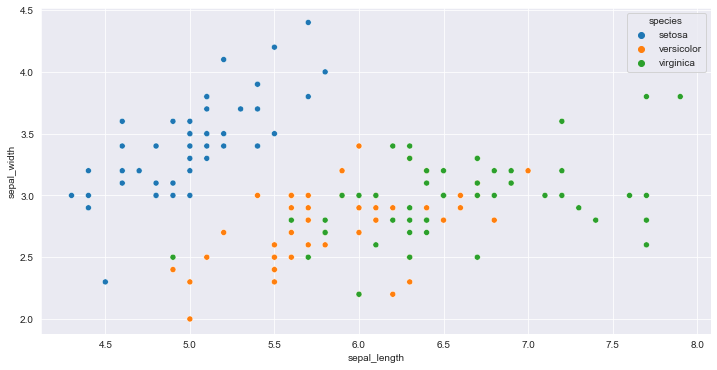

In [8]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
sns.scatterplot(x=iris_df.sepal_length,y=iris_df.sepal_width,hue=iris_df.species)

**Elbow Method**

In [9]:
x = iris_df.iloc[:,[0,1,2,3]].values
sse =[]
k_rng = range(1,11)
for k in k_rng:
    km = KMeans(n_clusters = k, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    sse.append(km.inertia_)

Text(0, 0.5, 'Sum of Squared Error')

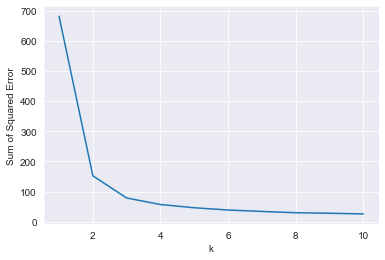

In [10]:
plt.plot(k_rng,sse)
plt.xlabel('k')
plt.ylabel('Sum of Squared Error')

**Predictive modelling**

In [11]:
km = KMeans(n_clusters=3)
km_pred = km.fit_predict(x)
km_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [12]:
km.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [13]:
iris_df['clusters'] = km_pred

In [14]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species,clusters
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,0
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


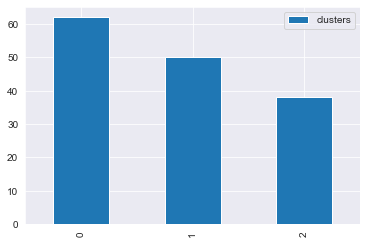

In [15]:
iris_df['clusters'].value_counts().plot(kind='bar')
plt.legend()

**Final Prediction**

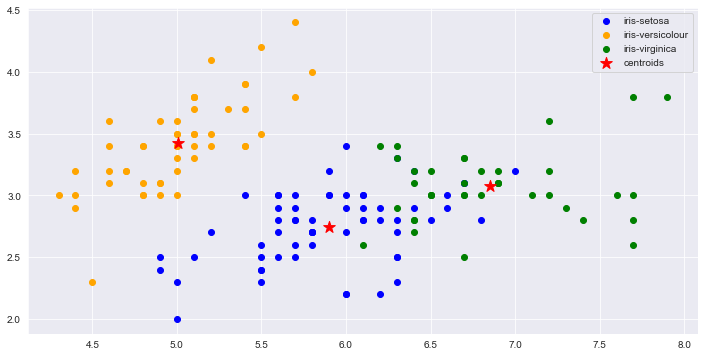

In [16]:
plt.figure(figsize=(12,6))
plt.scatter(x[km_pred==0,0],x[km_pred==0,1],label='iris-setosa',color='blue')
plt.scatter(x[km_pred==1,0],x[km_pred==1,1],label='iris-versicolour',color='orange')
plt.scatter(x[km_pred==2,0],x[km_pred==2,1],label='iris-virginica',color='green')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=150,marker='*',c='red',label='centroids')
plt.legend()